In [1]:
import os 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sql_functions import read_query

In [3]:
query = 'select * from customers limit 4;'
read_query(query)

,CustomerID,FirstName,LastName,Email,Phone,Address,State
0,C-2023-100-1,Mahika,Sunder,MahikaSunder_11@zmail.com,03412176590,"H.No. 155, Chana",Assam
1,C-2023-100-10,Zeeshan,Vasa,ZeeshanVasa_1@zmail.com,+911151051656,"52, Roy Nagar",Tripura
2,C-2023-100-100,Aaina,Sachdeva,AainaSachdeva_9@zmail.com,+918834507719,"75/92, Kade Marg",Nagaland
3,C-2023-100-101,Shray,Bajwa,ShrayBajwa_11@zmail.com,07410498662,"45, Bora Ganj",Manipur


In [4]:
query = 'show tables;'
read_query(query)

,Tables_in_swiftmarket
0,categories
1,customers
2,employees
3,salesdata
4,subcategories
5,suppliers


In [5]:
query = """Select * from salesdata limit 3;"""
read_query(query)



,SaleID,CustomerID,SubcatID,EmployeeID,SaleDate,Quantity,TotalPrice
0,23000,C-2023-100-12,6002,1100,2023-05-02,2,176432.00
1,23001,C-2023-100-141,6029,1115,2023-12-26,2,47172.00
2,23002,C-2023-100-86,6029,1035,2023-03-26,2,47172.00


In [6]:
query = """Select s.customerid, c.firstname,s.saledate,s.totalprice
from salesdata s
join customers c
on s.customerid = c.customerid
limit 5;"""

read_query(query)

,customerid,firstname,saledate,totalprice
0,C-2023-100-12,Farhan,2023-05-02,176432.00
1,C-2023-100-141,Nirvi,2023-12-26,47172.00
2,C-2023-100-86,Zaina,2023-03-26,47172.00
3,C-2023-100-72,Darshit,2023-08-01,117644.00
4,C-2023-100-142,Aarush,2023-03-06,336560.00


In [2]:
# Q.Get the top names of the highest purchasers customer's name of a whole year

query = """
Select t.customerid,c.firstname,t.expenditure
from 
(Select customerid,
sum(totalprice) as expenditure
from salesdata 
group by customerid) t
join customers c
on t.customerid=c.customerid
order by t.expenditure
limit 10; """


top_annual_customers = read_query(query)

In [3]:
top_annual_customers

,customerid,firstname,expenditure
0,C-2023-100-150,Taran,5841090.00
1,C-2023-100-80,Reyansh,5950321.00
2,C-2023-100-59,Biju,6243957.00
3,C-2023-100-24,Hunar,6504654.00
4,C-2023-100-85,Faiyaz,6590175.00
5,C-2023-100-103,Anvi,6676018.00
6,C-2023-100-171,Saksham,6748067.00
7,C-2023-100-123,Prisha,6835961.00
8,C-2023-100-107,Jivika,6842296.00
9,C-2023-100-51,Tejas,6868748.00


In [9]:
top_annual_customers['expenditure'].values

array([Decimal('5841090.00'), Decimal('5950321.00'),
       Decimal('6243957.00'), Decimal('6504654.00'),
       Decimal('6590175.00'), Decimal('6676018.00'),
       Decimal('6748067.00'), Decimal('6835961.00'),
       Decimal('6842296.00'), Decimal('6868748.00')], dtype=object)

In [10]:
top_annual_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customerid   10 non-null     object
 1   firstname    10 non-null     object
 2   expenditure  10 non-null     object
dtypes: object(3)
memory usage: 372.0+ bytes


In [5]:
# need to change the datatype of the expentiure onject into numbers (float or int)

top_annual_customers['expenditure'] = top_annual_customers['expenditure'].astype(float)


In [6]:
top_annual_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customerid   10 non-null     object 
 1   firstname    10 non-null     object 
 2   expenditure  10 non-null     float64
dtypes: float64(1), object(2)
memory usage: 372.0+ bytes


In [7]:
customer_names = top_annual_customers['firstname'].values

In [8]:
customer_exp = top_annual_customers['expenditure'].values

In [9]:
customer_names

array(['Taran', 'Reyansh', 'Biju', 'Hunar', 'Faiyaz', 'Anvi', 'Saksham',
       'Prisha', 'Jivika', 'Tejas'], dtype=object)

In [10]:
customer_exp

array([5841090., 5950321., 6243957., 6504654., 6590175., 6676018.,
       6748067., 6835961., 6842296., 6868748.])

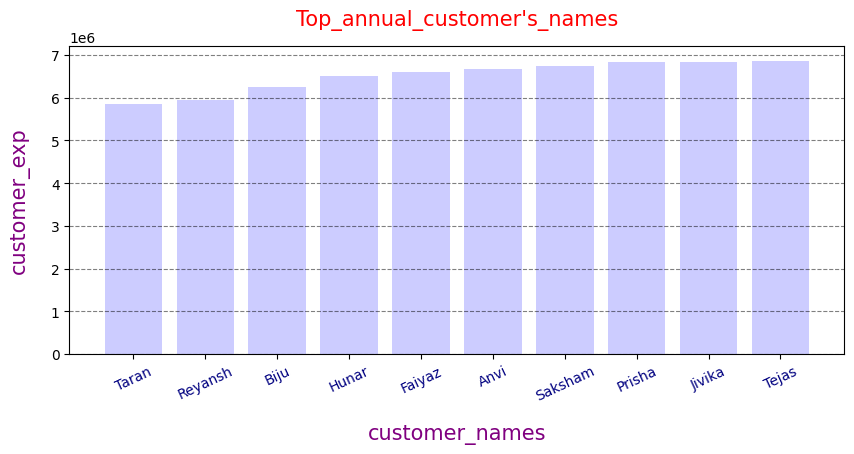

In [60]:
# customize the figure size
plt.figure(figsize=(10,4))

# ploting bar graph
plt.bar(height =customer_exp,x=customer_names,color='#CCCCFF')

# giving title to the graph
plt.title("Top_annual_customer's_names",pad=15, size=15,color='red')

# using cmap
#cmap = plt.cm.Greens(np.linspace(0.5,1),len(customer_names))

# giving labels to the grapg
plt.xlabel('customer_names',labelpad=15, color='purple', size=15)
plt.ylabel('customer_exp',labelpad=15, c='purple',size=15)

# using anotation
plt.xticks(rotation = 25,c='#000080')

# applying grid
plt.grid(axis='y',alpha=0.5,color='black',ls='dashed')



plt.show()

In [17]:
1e6

1000000.0

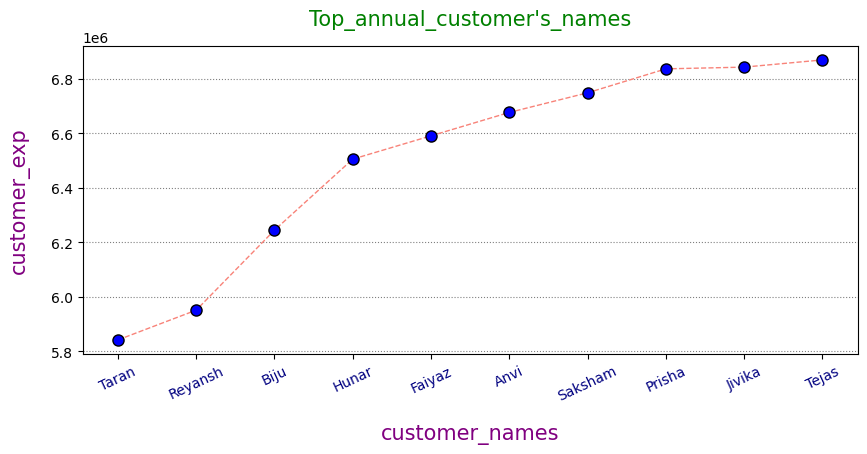

In [70]:
plt.figure(figsize=(10,4))

plt.plot(customer_names,customer_exp,color='#F88379',linestyle='dashed',marker='o',markeredgecolor='black',markersize = 8,mfc='blue',lw = 1) 

plt.title("Top_annual_customer's_names",pad=15, size=15,color='green')

plt.xlabel('customer_names',labelpad=15, color='purple', size=15)
plt.ylabel('customer_exp',labelpad=15, c='purple',size=15)

plt.xticks(rotation = 25,c='#000080')

plt.grid(axis='y',alpha=0.5,color='black',ls='dotted')


plt.show()